In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path_prefix = './cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [3]:
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


## Data Preprocessing

In [4]:
#data clean
df_train.isnull().sum()

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64

In [5]:
df_train.dtypes

rent_approval_date      object
town                    object
block                   object
street_name             object
flat_type               object
flat_model              object
floor_area_sqm         float64
furnished               object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
monthly_rent             int64
dtype: object

In [6]:
df_train.describe()
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
df_train['rent_approval_year'] = df_train['rent_approval_date'].dt.year
df_train['rent_approval_month'] = df_train['rent_approval_date'].dt.month/12 + df_train['rent_approval_date'].dt.year

In [7]:
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,rent_approval_year,rent_approval_month
0,2021-09-01,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,2021,2021.750000
1,2022-05-01,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,2022,2022.416667
2,2022-10-01,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,2022,2022.833333
3,2021-08-01,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,2021,2021.666667
4,2022-11-01,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,2022,2022.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09-01,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,north-east region,2200,2021,2021.750000
59996,2023-04-01,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100,2023,2023.333333
59997,2022-06-01,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,east region,2250,2022,2022.500000
59998,2023-01-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700,2023,2023.083333


In [8]:
df_train.describe()

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent,rent_approval_year,rent_approval_month
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.000000,60000.000000
mean,94.480458,1990.876367,1.359443,103.840110,0.0,2590.328333,2021.813050,2022.299508
std,24.082642,12.141435,0.042505,0.071627,0.0,714.910468,0.780006,0.758707
min,34.000000,1966.000000,1.270380,103.685228,0.0,300.000000,2021.000000,2021.083333
25%,73.000000,1981.000000,1.330939,103.778803,0.0,2100.000000,2021.000000,2021.666667
50%,93.000000,1988.000000,1.354024,103.845301,0.0,2400.000000,2022.000000,2022.250000
75%,110.000000,2000.000000,1.386968,103.897418,0.0,3000.000000,2022.000000,2023.000000
max,215.000000,2019.000000,1.457071,103.964915,0.0,6950.000000,2023.000000,2023.583333


In [9]:
print(df_train['town'].unique())
print(df_train['flat_type'].unique())
print(df_train['flat_model'].unique())

['jurong east' 'bedok' 'toa payoh' 'pasir ris' 'kallang/whampoa'
 'bukit panjang' 'sengkang' 'ang mo kio' 'bishan' 'punggol'
 'choa chu kang' 'clementi' 'bukit batok' 'sembawang' 'jurong west'
 'woodlands' 'queenstown' 'yishun' 'bukit timah' 'marine parade'
 'bukit merah' 'geylang' 'hougang' 'tampines' 'serangoon' 'central']
['3 room' '4-room' '3-room' 'executive' '5 room' '4 room' '5-room'
 '2-room' '2 room']
['new generation' 'improved' 'apartment' 'premium apartment' 'simplified'
 'model a' 'standard' 'dbss' 'model a2' 'maisonette' 'model a-maisonette'
 'type s1' 'adjoined flat' 'type s2' 'premium apartment loft' '2-room'
 'premium maisonette' 'terrace' '3gen']


In [10]:
#remove '-'
df_train['flat_type'] = df_train['flat_type'].str.replace('-', ' ')
df_train['flat_model'] = df_train['flat_model'].str.replace('-', ' ')

In [11]:
#map all categorical variables to the mean of monthly rent
def category_map_mean(df_origin, df_train_):
    df = df_origin.copy()
    #map town decrease order
    grouby_town = df_train_.groupby('town')['monthly_rent'].mean()
    town_map = grouby_town.index
    town_map_dict = {town_map[i]: grouby_town[town_map[i]] for i in range(len(town_map))}
    df['town'] = df['town'].apply(lambda x: town_map_dict[x] if x in town_map_dict else -1)

    #map block decrease order
    grouby_block = df_train_.groupby('block')['monthly_rent'].mean()
    block_map = grouby_block.index
    block_map_dict = {block_map[i]: grouby_block[block_map[i]] for i in range(len(block_map))}
    df['block'] = df['block'].apply(lambda x: block_map_dict[x] if x in block_map_dict else -1)

    #map flat_type decrease order
    grouby_flat_type = df_train_.groupby('flat_type')['monthly_rent'].mean()
    flat_type_map = grouby_flat_type.index
    flat_type_map_dict = {flat_type_map[i]: grouby_flat_type[flat_type_map[i]] for i in range(len(flat_type_map))}
    df['flat_type'] = df['flat_type'].apply(lambda x: flat_type_map_dict[x] if x in flat_type_map_dict else -1)

    #map flat_model decrease order
    grouby_flat_model = df_train_.groupby('flat_model')['monthly_rent'].mean()
    flat_model_map = grouby_flat_model.index
    flat_model_map_dict = {flat_model_map[i]: grouby_flat_model[flat_model_map[i]] for i in range(len(flat_model_map))}
    df['flat_model'] = df['flat_model'].apply(lambda x: flat_model_map_dict[x] if x in flat_model_map_dict else -1)

    #map planning_area decrease order
    grouby_planning_area = df_train_.groupby('planning_area')['monthly_rent'].mean()
    planning_area_map = grouby_planning_area.index
    planning_area_map_dict = {planning_area_map[i]: grouby_planning_area[planning_area_map[i]] for i in range(len(planning_area_map))}
    df['planning_area'] = df['planning_area'].apply(lambda x: planning_area_map_dict[x] if x in planning_area_map_dict else -1)

    #map region decrease order
    grouby_region = df_train_.groupby('region')['monthly_rent'].mean()
    region_map = grouby_region.index
    region_map_dict = {region_map[i]: grouby_region[region_map[i]] for i in range(len(region_map))}
    df['region'] = df['region'].apply(lambda x: region_map_dict[x] if x in region_map_dict else -1)

    #map street_name decrease order
    grouby_street_name = df_train_.groupby('street_name')['monthly_rent'].mean()
    street_name_map = grouby_street_name.index
    street_name_map_dict = {street_name_map[i]: grouby_street_name[street_name_map[i]] for i in range(len(street_name_map))}
    df['street_name'] = df['street_name'].apply(lambda x: street_name_map_dict[x] if x in street_name_map_dict else -1)

    #map subzone decrease order
    grouby_subzone = df_train_.groupby('subzone')['monthly_rent'].mean()
    subzone_map = grouby_subzone.index
    subzone_map_dict = {subzone_map[i]: grouby_subzone[subzone_map[i]] for i in range(len(subzone_map))}
    df['subzone'] = df['subzone'].apply(lambda x: subzone_map_dict[x] if x in subzone_map_dict else -1)

    '''
    #map rent_approval_date decrease order
    grouby_rent_approval_date = df_train_.groupby('rent_approval_date')['monthly_rent'].mean()
    rent_approval_date_map = grouby_rent_approval_date.index
    rent_approval_date_map_dict = {rent_approval_date_map[i]: grouby_rent_approval_date[rent_approval_date_map[i]] for i in range(len(rent_approval_date_map))}
    df['rent_approval_date_mean'] = df['rent_approval_date'].apply(lambda x: rent_approval_date_map_dict[x] if x in rent_approval_date_map_dict else grouby_rent_approval_date.mean())
    '''
    
    

    return df

In [12]:
#add KNN feature
from sklearn.neighbors import KNeighborsRegressor



def add_KNN_feature(df_origin, df_pos, K: int):
    KNN_X = df_pos[['latitude', 'longitude']]
    KNN_X['latitude'] *= 2
    KNN_y = df_pos['monthly_rent']

    KNN_model = KNeighborsRegressor(n_neighbors=K)
    KNN_model.fit(KNN_X, KNN_y)

    predict_X = df_origin[['latitude', 'longitude']]
    predict_X['latitude'] *= 2
    predict_y = KNN_model.predict(predict_X)
    df = df_origin.copy()

    df['K=' + str(K) + ' KNN'] = predict_y
    return df

## try with attributes with KNN_feature
* block
* street_name
* flat_type
* floor_area_sqm
* subzone
* rent_approval_date_mean
* KNN_feature
* price
## with method
* xgboost
* lgbm

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [175]:
def data_preprocess(df, df_train_):
    df = df.copy()
    df_train_ = df_train_.copy()

    df['flat_type'] = df['flat_type'].str.replace('-', ' ')
    
    #normalize by date
    means = df_train_.groupby('rent_approval_date')['monthly_rent'].mean()
    stds = df_train_.groupby('rent_approval_date')['monthly_rent'].std()
    df['monthly_rent'] = df.apply(lambda x: (x['monthly_rent'] - means[x['rent_approval_date']]) / stds[x['rent_approval_date']], axis=1)
    df_train_['monthly_rent'] = df_train_.apply(lambda x: (x['monthly_rent'] - means[x['rent_approval_date']]) / stds[x['rent_approval_date']], axis=1)
    #normalize monthly rent by date
    

    df = category_map_mean(df, df_train_)
    df.drop(['elevation'], axis=1, inplace=True)
    df.drop(['furnished'], axis=1, inplace=True)
    '''
    for K in [8, 16, 32, 64, 128]:
        df = add_KNN_feature(df, df_train_, K)
    '''

    for col in df.columns:
        #change -1 to KNN K=8
        if df[col].dtype == 'float64':
            df[col] = df[col].apply(lambda x: df[col][df[col] != -1].mean() if x == -1 else x)
    
    
    df.drop(['latitude'], axis=1, inplace=True)
    df.drop(['longitude'], axis=1, inplace=True)
    df.drop(['rent_approval_date'], axis=1, inplace=True)
    #df.drop(['block'], axis=1, inplace=True)

    return df

In [176]:
from scipy.stats import zscore
def handle_outliers(group, attribute):
    z_scores = zscore(group[attribute])
    threshold = 3 
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
    print(len(outlier_indices))
    return group[(z_scores < threshold)]  

In [177]:
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [178]:
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,north-east region,2200
59996,2023-04,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100
59997,2022-06,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,east region,2250
59998,2023-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700


In [179]:
# handle outlier
grouped = df_train.groupby('rent_approval_date', group_keys=False)
df_train = grouped.apply(handle_outliers, attribute='monthly_rent')
df_train.reset_index(drop=True, inplace=True)

16
6
16
12
15
6
13
9
6
6
8
13
3
2
5
9
11
6
17
1
15
10
5
5
7
7
5
9
5
7
7


In [180]:
ds_train_processed = data_preprocess(df_train, df_train)
#ds_test_processed = data_preprocess(df_test, df_train)
ds_train_processed

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,planning_area,region,monthly_rent
0,0.051473,-0.082555,-0.120922,0.422344,0.192902,110.0,2005,-0.031518,0.051473,-0.063878,-0.116219
1,0.051473,-0.519122,-0.002345,0.422344,0.192902,110.0,2003,0.040445,0.051473,-0.063878,-0.116219
2,0.106384,0.078232,0.465284,0.193703,0.033228,91.0,2002,0.501446,0.106384,-0.030275,0.020175
3,-0.144284,-0.062627,0.021383,0.193703,-0.258774,90.0,1999,-0.098247,-0.144284,-0.030275,-0.389005
4,0.106384,0.900584,0.619331,0.422344,0.093422,110.0,2001,0.501446,0.106384,-0.030275,2.202466
...,...,...,...,...,...,...,...,...,...,...,...
59790,0.106384,0.568011,0.283341,0.193703,0.033228,105.0,1989,0.096461,0.106384,-0.030275,0.925308
59791,-0.345850,0.012745,-0.428102,0.193703,0.033228,104.0,1988,-0.338428,-0.345850,-0.244738,0.116011
59792,0.443363,-0.032443,1.018424,0.193703,0.033228,93.0,2018,0.776040,0.442763,0.248731,1.547844
59793,-0.190295,-0.140758,-0.484442,-0.614001,-0.380253,82.0,1978,0.034070,-0.190295,0.248731,-3.121176


In [181]:
# attributes = ds_train_processed.keys()[ds_train_processed.keys() != 'rent_approval_date']
# grouped = ds_train_processed.groupby('rent_approval_date')
# for attribute in attributes:
#     ds_train_processed = grouped.apply(handle_outliers, attribute=attribute)

In [182]:
ds_train_processed.describe()

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,planning_area,region,monthly_rent
count,5.979500e+04,5.979500e+04,5.979500e+04,59795.000000,5.979500e+04,59795.000000,59795.000000,5.979500e+04,5.979500e+04,5.979500e+04,5.979500e+04
mean,1.699266e-17,1.936926e-17,1.806213e-17,-0.012535,3.364368e-17,94.422686,1990.840940,1.841862e-17,1.660646e-17,2.141907e-17,1.930984e-17
std,2.489149e-01,4.032037e-01,4.555203e-01,0.491349,2.774557e-01,24.075897,12.124255,3.828516e-01,2.526266e-01,1.527347e-01,9.997491e-01
min,-3.458497e-01,-3.014131e+00,-1.938144e+00,-1.713515,-1.486441e+00,34.000000,1966.000000,-7.964509e-01,-3.458497e-01,-2.447379e-01,-4.577843e+00
25%,-1.980409e-01,-2.286853e-01,-3.078370e-01,-0.614001,-2.114450e-01,73.000000,1981.000000,-2.473242e-01,-1.980409e-01,-6.387803e-02,-7.158524e-01
50%,1.223405e-02,-7.395073e-02,-6.449330e-02,0.193703,3.322755e-02,93.000000,1988.000000,-3.991369e-02,1.223405e-02,-3.027456e-02,-7.932483e-02
75%,1.063841e-01,1.613159e-01,2.326726e-01,0.422344,9.342227e-02,110.000000,2000.000000,1.112461e-01,1.063841e-01,-1.551160e-02,6.510527e-01
max,7.477542e-01,2.874730e+00,2.265644e+00,0.577593,2.284857e+00,192.000000,2019.000000,1.899244e+00,1.159714e+00,2.487311e-01,3.090164e+00


In [183]:
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [184]:
means = df_train.groupby('rent_approval_date')['monthly_rent'].mean()
stds = df_train.groupby('rent_approval_date')['monthly_rent'].std()

In [185]:
X = ds_train_processed.drop(['monthly_rent'], axis=1)
y = ds_train_processed['monthly_rent']
real_y = df_train['monthly_rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
real_X_train, real_X_test, real_y_train, real_y_test = train_test_split(df_train, real_y, test_size=0.3, random_state=42)

xgb_model = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.005,
    )

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_pred = y_pred * stds[real_X_test['rent_approval_date']] + means[real_X_test['rent_approval_date']]

print('LGBM MAE: ', mean_absolute_error(real_y_test, y_pred))
print('LGBM RMSE: ', mean_squared_error(real_y_test, y_pred, squared=False))



LGBM MAE:  358.29190457888643
LGBM RMSE:  469.27057122940363


In [191]:
#submission
model = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.005,
    )

model.fit(X, y)
df_test['monthly_rent'] = 0

ds_test_processed = data_preprocess(df_test, df_train)
ds_test_processed.drop(['monthly_rent'], axis=1, inplace=True)
y_pred = model.predict(ds_test_processed)

y_pred = y_pred * stds[df_test['rent_approval_date']] + means[df_test['rent_approval_date']]
y_pred.reset_index(drop=True, inplace=True)
submission = pd.read_csv(path_prefix + 'example-submission.csv')
submission['Predicted'] = y_pred
submission.to_csv('submission.csv', index=False)

In [101]:
#tuning parameters split by year with grid search
from sklearn.model_selection import GridSearchCV



n_estimators = [100, 200, 500, 1000, 2000, 5000, 10000]
learning_rate = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]

param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)
lgb_model = LGBMRegressor()
grid_search = GridSearchCV(lgb_model, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=5, verbose=1)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))





    
    



Fitting 5 folds for each of 49 candidates, totalling 245 fits
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 10
[LightGBM] [Info] Start training from score -0.000000
Best: -0.773025 using {'learning_rate': 0.005, 'n_estimators': 2000}


In [148]:
#use KNN to predict
models_KNN = {}
params_KNN = {}
scores_KNN = {}

Ks = range(4, 129, 4)

for date in dates:
    X_train = df_train_dates_processed[date].drop(['monthly_rent'], axis=1)
    y_train = df_train_dates_processed[date]['monthly_rent']

    print('date:', date, 'start')
    model = KNeighborsRegressor()
    param_grid = dict(n_neighbors=Ks)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1, cv=4)

    grid_result = grid.fit(X_train, y_train)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)
    models_KNN[date] = grid_result.best_estimator_
    params_KNN[date] = grid_result.best_params_
    scores_KNN[date] = grid_result.best_score_
    print('date:', date, 'end')


NameError: name 'dates' is not defined

In [151]:
#predict by other dates
date_model = dates[10]
date_predict = dates[-1]

model = models[date_model]
X_val = df_train_dates_processed[date_predict].drop(['monthly_rent', 'latitude', 'longitude'], axis=1)
y_val = df_train_dates_processed[date_predict]['monthly_rent']
y_pred = model.predict(X_val)

y_pred = np.sqrt(y_pred) * 100

print('date_model:', date_model)
print('date_predict:', date_predict)
print('RMSE:', mean_squared_error(y_val, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_val, y_pred))

df_pred = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
sns.scatterplot(data=df_pred, x='y_val', y='y_pred')


NameError: name 'dates' is not defined

In [ ]:
for key, value in scores.items():
    print(key, value)

2021-01-01 00:00:00 -243.26380816929526
2021-02-01 00:00:00 -245.26910176289607
2021-03-01 00:00:00 -261.1010922081034
2021-04-01 00:00:00 -258.877466261093
2021-05-01 00:00:00 -265.37836591232656
2021-06-01 00:00:00 -274.28175022454496
2021-07-01 00:00:00 -285.21239399824395
2021-08-01 00:00:00 -291.0539027674771
2021-09-01 00:00:00 -283.8579494258445
2021-10-01 00:00:00 -283.34974916581234
2021-11-01 00:00:00 -287.21344490109243
2021-12-01 00:00:00 -314.27709381655825
2022-01-01 00:00:00 -343.2702636526094
2022-02-01 00:00:00 -365.4740818937937
2022-03-01 00:00:00 -399.82660349193463
2022-04-01 00:00:00 -397.77580211630766
2022-05-01 00:00:00 -425.6989018178855
2022-06-01 00:00:00 -445.28283051327185
2022-07-01 00:00:00 -489.94112381436344
2022-08-01 00:00:00 -494.09966251501817
2022-09-01 00:00:00 -523.3240435379234
2022-10-01 00:00:00 -557.6469764064093
2022-11-01 00:00:00 -596.1580065937019
2022-12-01 00:00:00 -571.2230249493089
2023-01-01 00:00:00 -588.8893994020717
2023-02-01 00

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1607
[LightGBM] [Info] Number of data points in the train set: 866, number of used features: 14
[LightGBM] [Info] Start training from score 2441.108545
RMSE: 385.8020066532291
MAE: 296.39858652359453


<Axes: xlabel='y_val', ylabel='y_pred'>

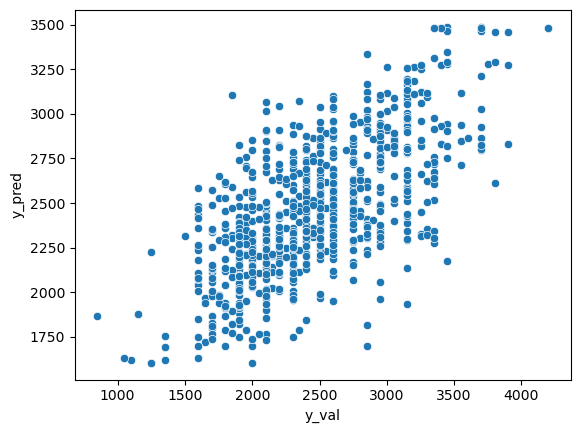

In [114]:
date = dates[15]
X_train = df_train_dates_processed[date].drop(['monthly_rent'], axis=1)
y_train = df_train_dates_processed[date]['monthly_rent']

X, X_val, y, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
model = LGBMRegressor(n_estimators=params[date]['n_estimators'], learning_rate=params[date]['learning_rate'])
model.fit(X, y)
y_pred = model.predict(X_val)

print('RMSE:', mean_squared_error(y_val, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_val, y_pred))
df_pred = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
sns.scatterplot(data=df_pred, x='y_val', y='y_pred')



C:\Users\Concyclics\AppData\Local\Temp\ipykernel_23884\3547464200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, hist=False, label='y_val')
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_23884\3547464200.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, 

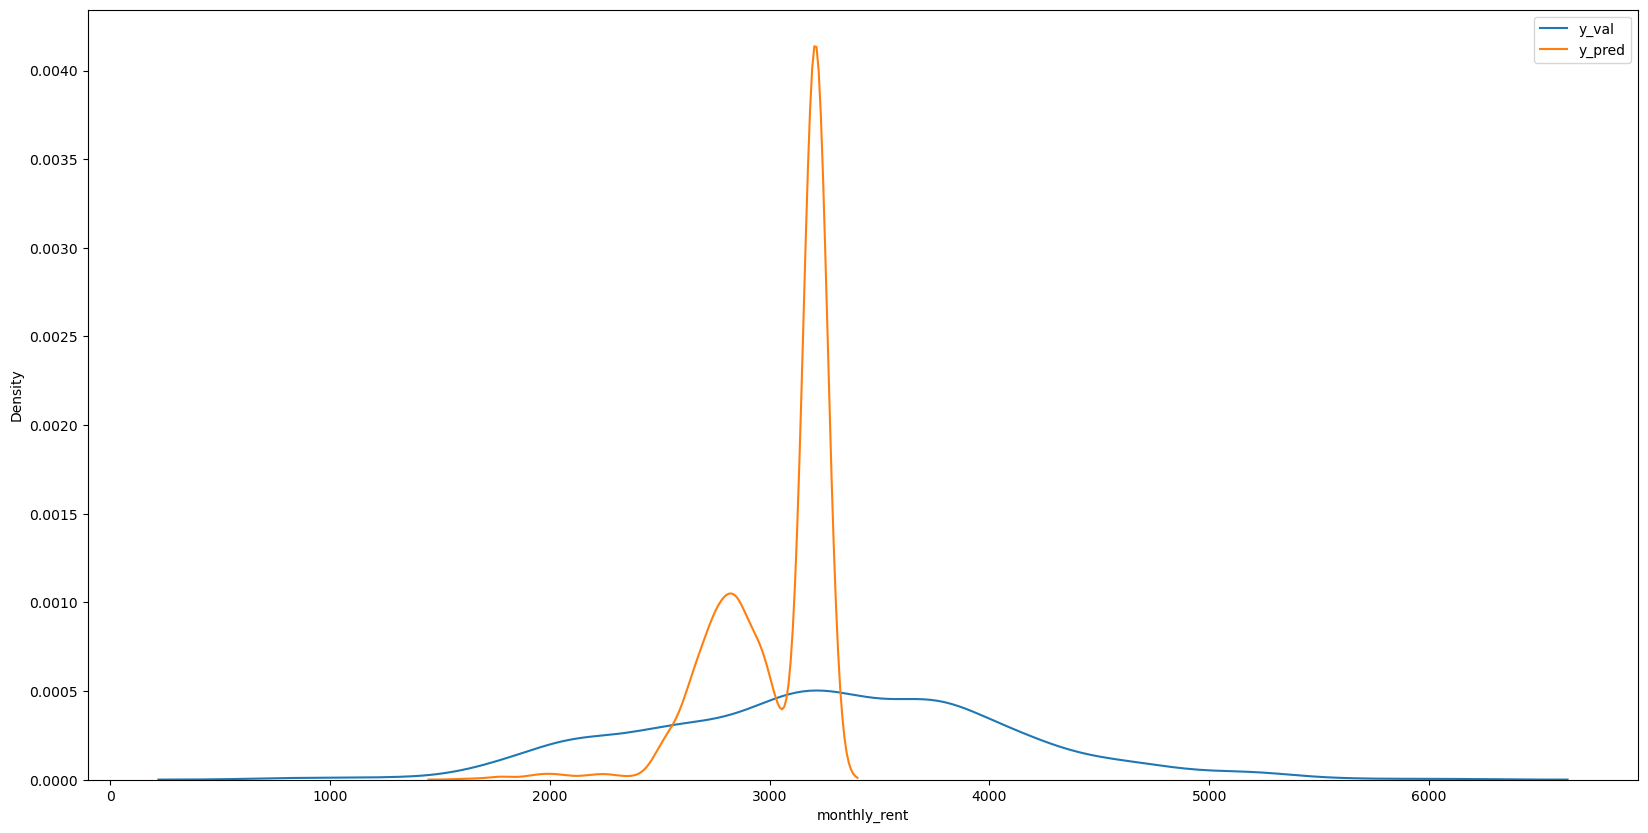

In [139]:
#plot distribution from predcit and real
plt.figure(figsize=(20, 10))
sns.distplot(y_val, hist=False, label='y_val')
sns.distplot(y_pred, hist=False, label='y_pred')
plt.legend()
plt.show()

In [145]:
#predict test
df_test_pred = {}
for date in dates:
    X_test = df_test_dates_processed[date]
    y_test_pred = models[date].predict(X_test)
    #use index to store
    df_test_pred[date] = pd.DataFrame({'index': X_test.index, 'monthly_rent': y_test_pred})

df_test_pred[dates[10]]


NameError: name 'dates' is not defined

In [98]:
#concat all test pred
df_test_pred_all = pd.concat([df_test_pred[date] for date in dates])
df_test_pred_all.sort_values(by=['index'], inplace=True)
df_test_pred_all

,index,monthly_rent
0,0,3494.065681
0,1,2463.410021
0,2,3515.199702
0,3,2215.355927
0,4,2288.923235
...,...,...
763,29995,2656.207692
960,29996,3037.480713
971,29997,2743.983968
961,29998,3513.342630


In [104]:
df_test_pred_all.reset_index(drop=True, inplace=True)
df_test_pred_all

,index,monthly_rent
0,0,3494.065681
1,1,2463.410021
2,2,3515.199702
3,3,2215.355927
4,4,2288.923235
...,...,...
29995,29995,2656.207692
29996,29996,3037.480713
29997,29997,2743.983968
29998,29998,3513.342630


In [106]:
#submit
df_submit = pd.read_csv(path_prefix + 'example-submission.csv')
#df_submit
df_submit['Predicted'] = df_test_pred_all['monthly_rent']
df_submit.to_csv('submit.csv', index=False)

In [150]:
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=500,
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_val)
print('LGBM MAE: ', mean_absolute_error(y_val, y_pred))
print('LGBM RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)



NameError: name 'X_val' is not defined

In [ ]:
#submit with LGBM
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=500,
)

LGBM.fit(df_train_X, df_train_y)

submission = pd.read_csv(path_prefix + 'example-submission.csv')
submission['Predicted'] = LGBM.predict(df_test_X)

submission.to_csv('submission.csv', index=False)



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 10
[LightGBM] [Info] Start training from score 2590.328333


In [ ]:
#feature importance
lgb_model = LGBMRegressor()
features = X_train.columns
dict_feature_importance = {}

lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_val)

original_rmse = mean_squared_error(y_val, y_pred, squared=False)

for feature in features:
    X_train_tmp = X_train.drop([feature], axis=1)
    X_val_tmp = X_val.drop([feature], axis=1)
    lgb_model.fit(X_train_tmp, y_train)
    y_pred = lgb_model.predict(X_val_tmp)
    dict_feature_importance[feature] = mean_squared_error(y_val, y_pred, squared=False) - original_rmse


In [ ]:
for feature in features:
    print(feature, '\t\t', dict_feature_importance[feature])

block 		 6.781290413628653
street_name 		 3.2325207099596582
flat_type 		 0.8867685255146398
floor_area_sqm 		 0.10900175724748351
subzone 		 4.340516944205319
rent_approval_date_mean 		 -0.10558833569683657
adjusted_close 		 -0.4333536304993686
price 		 -0.13245692856355618


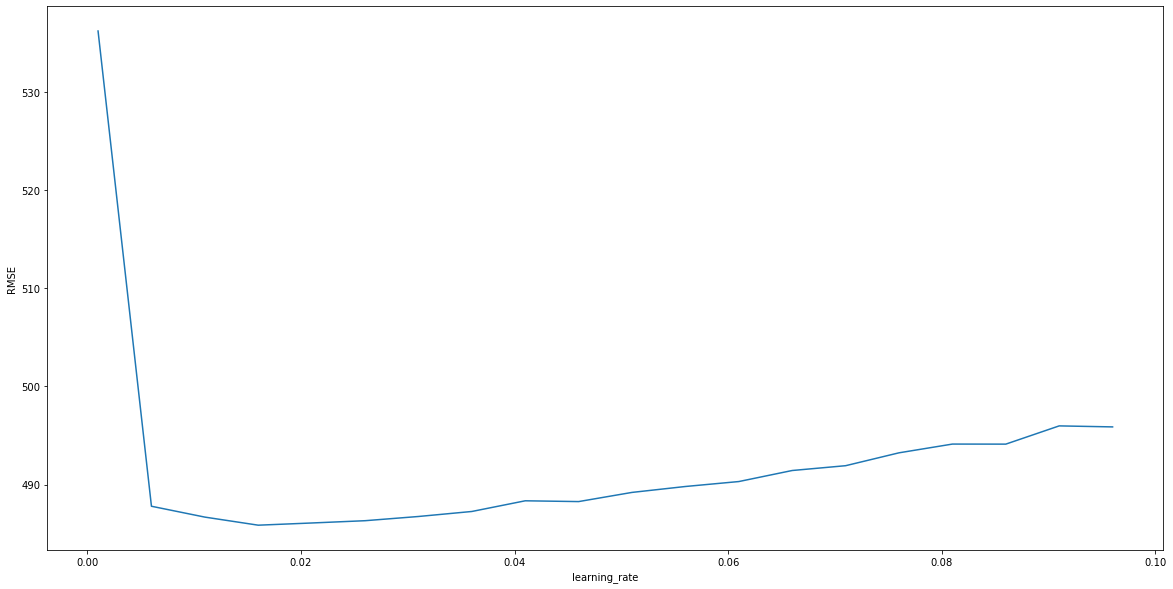

In [ ]:
#tuning with different learning rate
learning_rate_list = list(np.arange(0.001, 0.1, 0.005))
LGBM_RMSE_list = []
for learning_rate in learning_rate_list:
    LGBM = LGBMRegressor(
        learning_rate=learning_rate,
        n_estimators=1000,
    )

    LGBM.fit(X_train, y_train)
    y_pred = LGBM.predict(X_val)
    LGBM_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.figure(figsize=(20, 10))
plt.plot(learning_rate_list, LGBM_RMSE_list)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()